<a href="https://colab.research.google.com/github/Twujira/TigistData110/blob/main/Project1_Databreach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load The Data

In [ ]:
Databreach_df=pd.read_csv('https://raw.githubusercontent.com/Twujira/TigistData110/main/Dataset/biggestdatabreaches.csv')
Databreach_df.head()

,Entity,alternative name,records lost,YEAR,story,SECTOR,METHOD,interesting story,DATA SENSITIVITY,DISPLAYED RECORDS,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,AOL,American Online,"92,000,000",2004,Jun 2004. A former America Online software eng...,web,inside job,NaN,1,"92,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ameritrade Inc.,online broker,"200,000",2005,Apr 2005. Computer backup tape containing pers...,financial,lost device,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Citigroup,NaN,"3,900,000",2005,Jun 2005. Blame the messenger! A box of comput...,financial,lost device,y,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cardsystems Solutions Inc.,"Third-party payment processor for Visa, Master...","40,000,000",2005,Jun 2005. CardSystems was fingered by MasterCa...,financial,hacked,y,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AOL,American Online,"20,000,000",2006,Aug 2006. Derp. AOL voluntarily released searc...,web,oops!,y,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data breaches dataset has 349 rows and 28 cloumns. However, most of the columns are unnessesary. Therefore, we need to clean the dataset further to work with the columns only important ones to our analysis.

In [ ]:
#Creating a new dataset by filtering out unnecessary columns
NewDatabreach = Databreach_df[['Entity', 'records lost', 'YEAR', 'METHOD', 'SECTOR','DATA SENSITIVITY','source name']]
NewDatabreach

,Entity,records lost,YEAR,METHOD,SECTOR,DATA SENSITIVITY,source name
0,AOL,"92,000,000",2004,inside job,web,1,CNN
1,Ameritrade Inc.,"200,000",2005,lost device,financial,2,NBC
2,Citigroup,"3,900,000",2005,lost device,financial,3,NY Times
3,Cardsystems Solutions Inc.,"40,000,000",2005,hacked,financial,3,Wired
4,AOL,"20,000,000",2006,oops!,web,1,Tech Crunch
...,...,...,...,...,...,...,...
344,Suprema,"27,800,000",2019,poor security,tech,5,Guardian
345,Facebook,"419,000,000",2019,poor security,web,2,Fast Company
346,UCLA Health,"4,500,000",2015,hacked,healthcare,4,Health IT Security
347,DoorDash,"4,900,000",2019,NaN,transport,2,Techcrunch


The clean version of our dataset has 349 rows and 7 columns. This is an observational dataset. It is collected from different sources mainly medias like CNN,NBC, NY Times etc.

In [ ]:
#assess the dataset
NewDatabreach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Entity            349 non-null    object
 1   records lost      348 non-null    object
 2   YEAR              349 non-null    int64 
 3   METHOD            348 non-null    object
 4   SECTOR            349 non-null    object
 5   DATA SENSITIVITY  346 non-null    object
 6   source name       337 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.2+ KB


In [ ]:
# Number of Data Breaches Over Time
import plotly.graph_objects as go

sector_counts = NewDatabreach['YEAR'].value_counts()
sector_counts_above_10 = sector_counts[sector_counts >= 10]

fig = go.Figure()

fig.add_trace(go.Scatter(x=sector_counts_above_10.index, y=sector_counts_above_10.values,
                         mode='lines+markers', name='Data Breaches by Year', marker_color='brown'))

fig.update_layout(title='Number of Data Breaches Over Time',
                  xaxis_title='Year',
                  yaxis_title='Number of Data Breaches')

fig.show()

Although the number of data breaches up and down between the years, in general the number of breaches increased over time.

For instance, in the year 2007 there was only 10 data breach incidents. In 2018, 44 incidents recorded and in 2019, 42 incidents recorded.

In [ ]:
#Which sectors are more affected
sector_counts = NewDatabreach['SECTOR'].value_counts()
sector_counts_above_10 = sector_counts[sector_counts >= 10]
print(sector_counts_above_10)

web           98
healthcare    43
government    35
financial     35
retail        25
app           19
telecoms      14
academic      11
gaming        11
transport     10
Name: SECTOR, dtype: int64


When we assess the frequesncy of the incident to occur by sectors, the web sector is highly affected. 98 of the 349 incidents occured on the web, this held 28% of all incidents.

In [ ]:
#What is the percent share of each sector?
total_data_points = len(NewDatabreach)
sector_percentages = (sector_counts / total_data_points) * 100
print(sector_percentages.head(10))


web           28.080229
healthcare    12.320917
government    10.028653
financial     10.028653
retail         7.163324
app            5.444126
telecoms       4.011461
academic       3.151862
gaming         3.151862
transport      2.865330
Name: SECTOR, dtype: float64


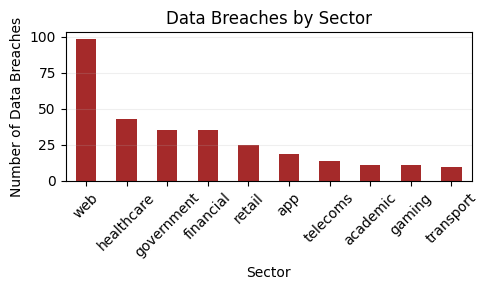

In [ ]:
#Which sectors are more affected?
sector_counts = NewDatabreach['SECTOR'].value_counts()
sector_counts_above_10 = sector_counts[sector_counts >= 10]

plt.figure(figsize=(5, 3))
sector_counts_above_10.plot(kind='bar', color='brown')
plt.title('Data Breaches by Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Data Breaches')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-', alpha=0.2)
plt.tight_layout()
plt.show()


In [ ]:

SENSITIVITY_counts = NewDatabreach['DATA SENSITIVITY'].value_counts()
sector_counts_above_20 = SENSITIVITY_counts[SENSITIVITY_counts >= 20]
print(SENSITIVITY_counts.head(5))

1    104
2    100
4     55
3     49
5     23
Name: DATA SENSITIVITY, dtype: int64


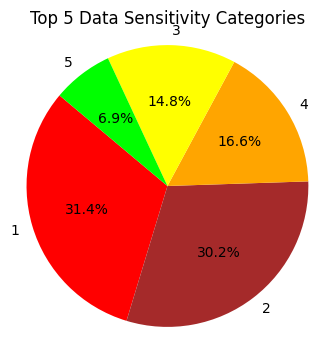

In [ ]:
#How sensitive was the lost data?
top_5_SENSITIVITY = SENSITIVITY_counts.head(5)

# Define custom colors
custom_colors = ['red','brown', 'orange', 'yellow', 'lime']

# Plotting
plt.figure(figsize=(4, 4))
plt.pie(top_5_SENSITIVITY, labels=top_5_SENSITIVITY.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.title('Top 5 Data Sensitivity Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
METHOD_counts = NewDatabreach['METHOD'].value_counts()
method_counts_above_20 = METHOD_counts[METHOD_counts >= 20]
print(METHOD_counts.head(4))

hacked           207
lost device       47
poor security     42
inside job        18
Name: METHOD, dtype: int64


In [ ]:
total_data_points = len(NewDatabreach)
METHOD_percentages = (METHOD_counts / total_data_points) * 100
print(METHOD_percentages.head(4))

hacked           59.312321
lost device      13.467049
poor security    12.034384
inside job        5.157593
Name: METHOD, dtype: float64


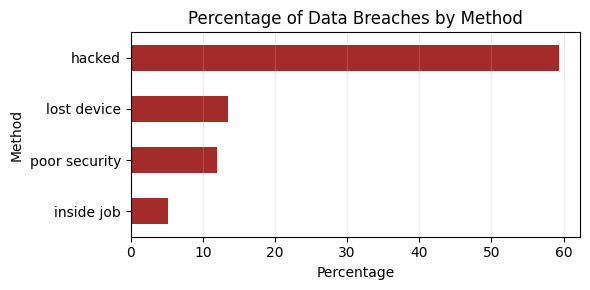

In [ ]:

plt.figure(figsize=(6, 3))
METHOD_percentages.head(4).plot(kind='barh', color='brown')
plt.title('Percentage of Data Breaches by Method')
plt.xlabel('Percentage')
plt.ylabel('Method')
plt.xticks(rotation='horizontal')
plt.verticalline=False
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()


Based on the above plot, 59% of the data breaches occured due to hacking,13% of them due to lost device, 12% them occured due to poor security, and 5% of them occured due to inside job which means a person working for the company exposed the data.

Recommendation

*  Know about data life cycle and data governance.

 1. Create
 2. Storage
 3. Use
 4. Share
 5. Archive
 6. Destroy




* I highly recommend identifying the risk factors of data breaches.

1. Retention: the length of time that the data exists.
2. Proliferation: the number of copies of data that exists.
3. Access: the number of people who have access, the ways that can be accessed, and the ease of obtaining access.
4. Liquidity: the time required to access, transfer, and process the data.
5. Value: the amount the data is worth.